In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
film_data = pd.read_csv('meta_data7.csv', encoding = "ISO-8859-1")
ch_mapping = pd.read_csv('character_mapping.csv', encoding = "ISO-8859-1")
ch_list = pd.read_csv('character_list5.csv', encoding = "ISO-8859-1")

In [3]:
film_data

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340
...,...,...,...,...,...,...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...
1998,3768,tt0421090,Zerophilia,2005,NaN,7647774446763347777777763774163455777777777634...


In [7]:
ch_mapping

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466
...,...,...,...,...,...
99385,9254,tt0101414,lumiere,lumiere,nm0001583
99386,9254,tt0101414,maurice,maurice,nm0263591
99387,9254,tt0101414,mrs potts,mrs. potts,nm0001450
99388,9254,tt0101414,townsfolk,NaN,nm0621121


In [8]:
ch_list

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0
...,...,...,...,...,...
23043,9254,lumiere,1063,m,56.0
23044,9254,maurice,1107,m,71.0
23045,9254,monsieur d'arqu,114,m,58.0
23046,9254,mrs. potts,564,f,66.0


In [11]:
ch_list.imdb_character_name.isna().any()

True

In [12]:
ch_list[ch_list.imdb_character_name.isna()]

,script_id,imdb_character_name,words,gender,age
4656,1807,NaN,146,f,NaN
19448,7445,NaN,520,f,NaN


How could we tell if the amount of dialogue was increasing over time in movies? How might this influence the assessment about the breakdown of gender dialogue?
How could test if there was any relationship between the film's gross value and the amount of dialogue in the film?

In [4]:
# How could we tell if the amount of dialogue was increasing over time in movies?

In [6]:
ch_list.columns.tolist()

['script_id', 'imdb_character_name', 'words', 'gender', 'age']

In [8]:
ch_list.gender.unique().tolist()

['f', 'm', '?']

In [12]:
script_dialogue = ch_list.groupby('script_id')['words'].sum().reset_index(name="total_dialogue")

In [15]:
film_dialogue = pd.merge(film_data, script_dialogue, on='script_id')

In [14]:
len(film_data), len(script_dialogue)

(2000, 2000)

In [19]:
film_dialogue

,script_id,imdb_id,title,year,gross,lines_data,total_dialogue
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,18500
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...,19680
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...,15968
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...,19628
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340,5145
...,...,...,...,...,...,...,...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...,33810
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...,13216
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...,13927
1998,3768,tt0421090,Zerophilia,2005,NaN,7647774446763347777777763774163455777777777634...,16686


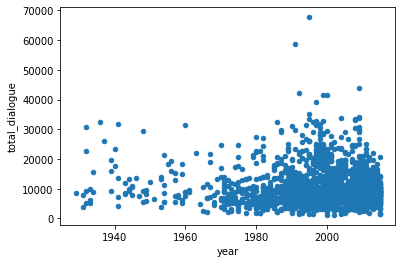

In [21]:
film_dialogue.plot.scatter(x='year', y='total_dialogue')

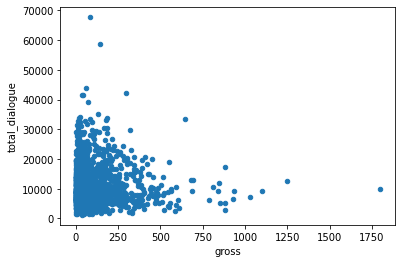

In [22]:
film_dialogue.plot.scatter(x='gross', y='total_dialogue')

In [24]:
gross_dialogue = film_dialogue[film_dialogue.gross > 0]

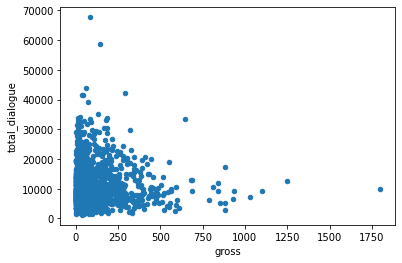

In [25]:
gross_dialogue.plot.scatter(x='gross', y='total_dialogue')